 ### 1) Linear and Logistic regression

### Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('headbrain.csv')

In [4]:
X = data['Head Size(cm^3)']
y = data['Brain Weight(grams)']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

model = LinearRegression()

model.fit(np.expand_dims(X_train, axis = 1), np.expand_dims(y_train, axis = 1))

prediction = model.predict(np.expand_dims(X_test, axis = 1))

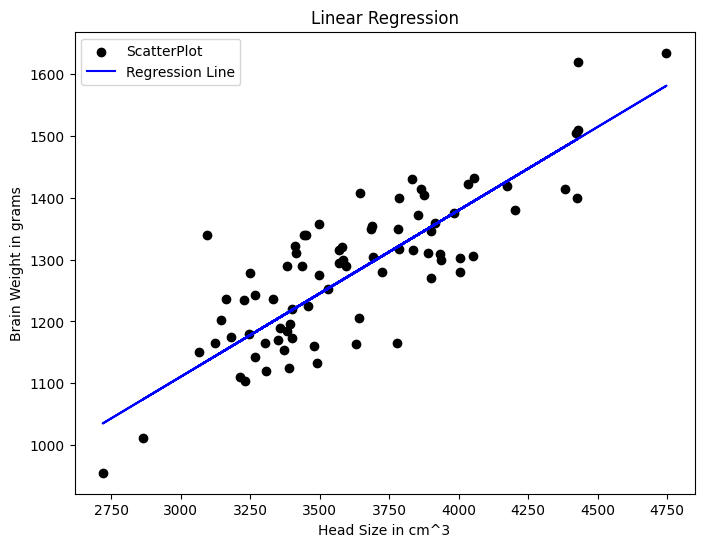

In [6]:
plt.figure(figsize = (8,6))
plt.scatter(X_test, y_test, color = 'black', label = 'ScatterPlot')
plt.plot(X_test, prediction, color = 'blue', label = 'Regression Line')
plt.title('Linear Regression')
plt.xlabel('Head Size in cm^3')
plt.ylabel('Brain Weight in grams')
plt.legend()

### Logistic Regression

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [8]:
data = pd.read_csv('diabetes.csv')

In [9]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,183,0,0,0,28.4,0.212,36,1
1,5,162,104,0,0,37.7,0.151,52,1
2,2,197,70,99,0,34.7,0.575,62,1
3,13,158,114,0,0,42.3,0.257,44,1
4,0,162,76,56,100,53.2,0.759,25,1
...,...,...,...,...,...,...,...,...,...
503,7,179,95,31,0,34.2,0.164,60,0
504,0,113,76,0,0,33.3,0.278,23,1
505,3,128,72,25,190,32.4,0.549,27,1
506,1,119,88,41,170,45.3,0.507,26,0


In [10]:
X = data.drop('Outcome', axis = 1)

In [11]:
y = data['Outcome']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

model = LogisticRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

C:\Users\Gowtham R\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
print("Accuracy Score : ", accuracy_score(y_test, predictions))

Accuracy Score :  0.7083333333333334


In [14]:
print("Classification Report : \n", classification_report(y_test, predictions))

Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.83      0.79       112
           1       0.58      0.46      0.51        56

    accuracy                           0.71       168
   macro avg       0.67      0.65      0.65       168
weighted avg       0.70      0.71      0.70       168



In [15]:
print("Confusion Matrix : \n", confusion_matrix(y_test, predictions))

Confusion Matrix : 
 [[93 19]
 [30 26]]


#### with titanic dataset

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [17]:
data = pd.read_csv('titanic.csv')

In [18]:
data

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,Pears,Mrs. Thomas (Edith Wearne),female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,Meo,Mr. Alfonzo,male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,van Billiard,Mr. Austin Blyler,male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,Olsen,Mr. Ole Martin,male,NaN,0,0,Fa 265302,7.3125,NaN,S


In [19]:
data['Age'].fillna(data['Age'].mean(),inplace = True)
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [20]:
data = pd.get_dummies(data, columns=['Sex','Embarked'],drop_first=True)

In [21]:
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = data['Survived']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
predictions = model.predict(X_test)

In [26]:
print(f'Accuracy:',accuracy_score(y_test, predictions))
print('Classification Report',classification_report(y_test, predictions))
print('Confusion Matrix \n',confusion_matrix(y_test,predictions))


Accuracy: 0.71875
Classification Report               precision    recall  f1-score   support

           0       0.77      0.81      0.79        21
           1       0.60      0.55      0.57        11

    accuracy                           0.72        32
   macro avg       0.69      0.68      0.68        32
weighted avg       0.71      0.72      0.72        32

Confusion Matrix 
 [[17  4]
 [ 5  6]]


### (2) Univariate and Multivariate Normal Distribution

### Univariate

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def univariate_normal(x, mean, variance):
    return((1 / np.sqrt(2 * np.pi * variance)) * np.exp(-(x - mean)**2 / (2 * variance)))

In [29]:
x = np.linspace(-3, 5, 100)

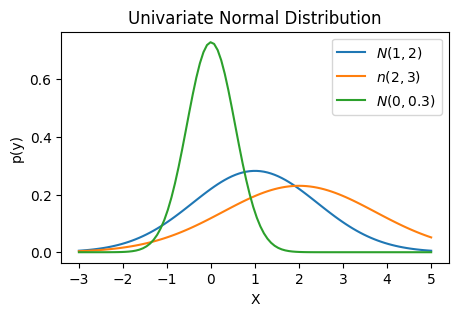

In [30]:
plt.figure(figsize = (5, 3))
plt.plot(x, univariate_normal(x, mean = 1, variance = 2), label = "$N(1, 2)$")
plt.plot(x, univariate_normal(x, mean = 2, variance = 3), label = "$n(2, 3)$")
plt.plot(x, univariate_normal(x, mean = 0, variance = 0.3), label = "$N(0, 0.3)$")
plt.title("Univariate Normal Distribution")
plt.xlabel("X")
plt.ylabel("p(y)")
plt.legend()

### Multivariate

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

In [32]:
mean = np.array([1,2])
covariance_matrix = np.array([[1, 0.5],[0.5, 2]])   #Diagonal cov-matrix

In [33]:
x, y =  np.meshgrid(np.linspace(-2, 4, 100), np.linspace(-2, 6, 100))
j = np.dstack((x,y))

In [34]:
pdf = multivariate_normal(mean, covariance_matrix)
z = pdf.pdf(j)

Text(0, 0.5, 'Y-axis')

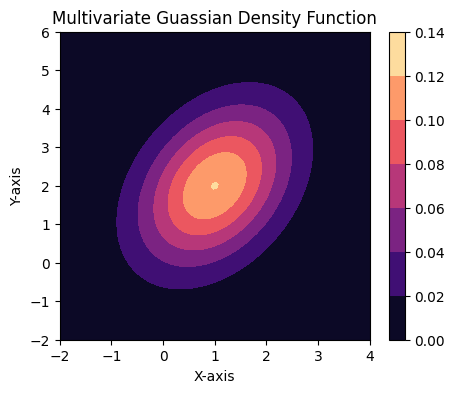

In [35]:
plt.figure(figsize = (5,4))
plt.contourf(x, y, z, cmap = 'magma')
plt.colorbar()
plt.title('Multivariate Guassian Density Function')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

In [36]:
mean = np.array([2, 3])
covariance_matrix = np.array([[1, 0.7],[0.7, 4]])  #non-diagonal cov-matrix

In [37]:
x, y = np.meshgrid(np.linspace(-1, 5, 100), np.linspace(0, 6, 100))
j = np.dstack((x, y))

In [38]:
pdf = multivariate_normal(mean, covariance_matrix)
z = pdf.pdf(j)

Text(0, 0.5, 'Y-axis')

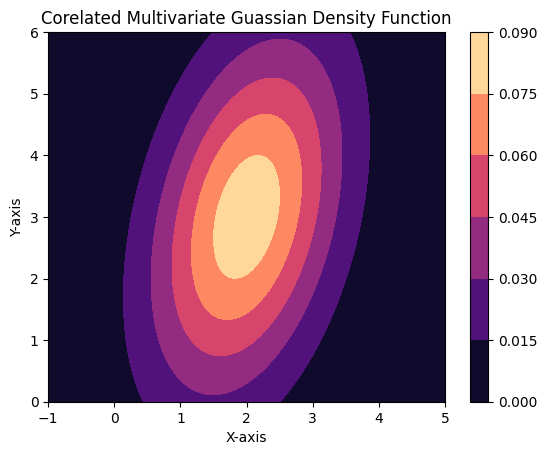

In [39]:
plt.contourf(x, y, z, cmap = 'magma')
plt.colorbar()
plt.title('Corelated Multivariate Guassian Density Function')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

### (3) PCA

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [41]:
data = pd.read_csv('Iris.csv')

In [42]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [43]:
X = data[data.columns[1:-1]]

In [44]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [45]:
scaled_X = StandardScaler().fit_transform(X)

In [46]:
reduced_X = PCA(n_components = 2).fit_transform(scaled_X)

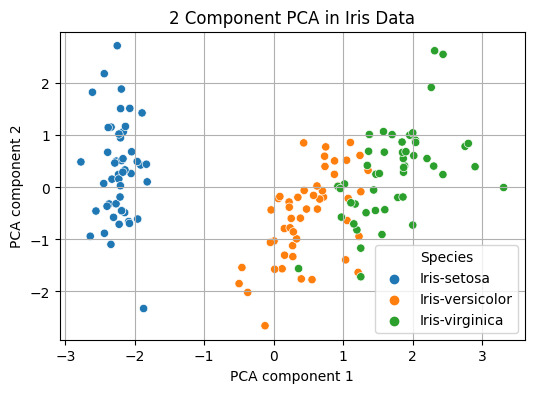

In [47]:
plt.figure(figsize=(6,4))
sns.scatterplot(x = np.ndarray.ravel(reduced_X[:,:1]), y = np.ndarray.ravel(reduced_X[:,1:]), hue = data['Species'])
plt.title('2 Component PCA in Iris Data')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.grid()

#### PCA for breast_cancer dataset

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

In [49]:
data = load_breast_cancer()

In [50]:
X = data['data']

In [51]:
scaled_X = StandardScaler().fit_transform(X)
reduced_X = PCA(n_components = 2).fit_transform(scaled_X)

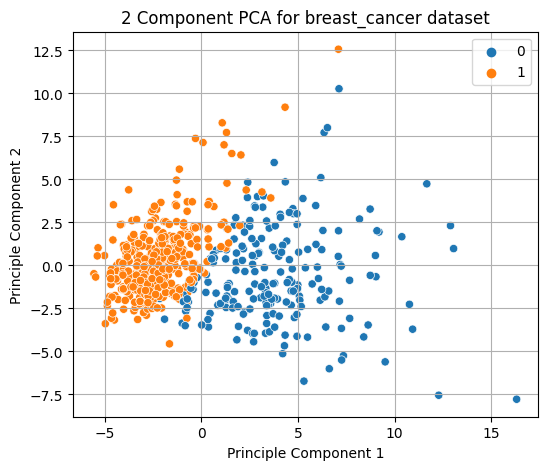

In [52]:
plt.figure(figsize=(6,5))
sns.scatterplot(x = np.ndarray.ravel(reduced_X[:,:1]), y = np.ndarray.ravel(reduced_X[:,1:]), hue = data['target'])
plt.title("2 Component PCA for breast_cancer dataset")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.grid()
plt.show()

### 4) KMeans

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [54]:
iris = load_iris()

In [55]:
X = iris.data

In [56]:
y = iris.target

In [57]:
num_clusters = 3

In [58]:
kmeans = KMeans(n_clusters = num_clusters,random_state = 42)

In [59]:
kmeans.fit(X)

C:\Users\Gowtham R\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [60]:
cluster_labels= kmeans.labels_
centroids = kmeans.cluster_centers_

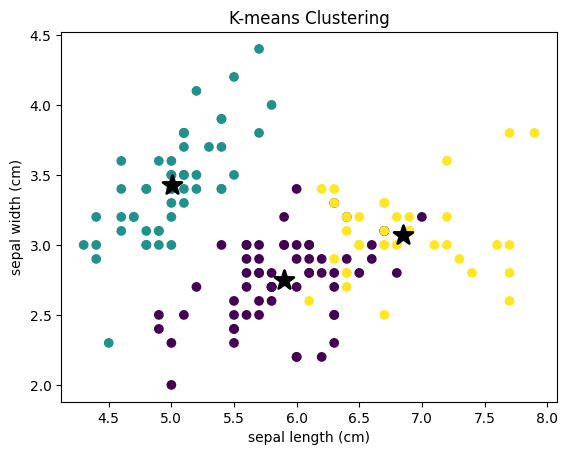

In [61]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, linewidths=2, color='black')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-means Clustering')
plt.show()

### GMM

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture

In [63]:
iris = load_iris()

In [64]:
X = iris.data

In [65]:
num_components = 3

In [66]:
gmm = GaussianMixture(n_components = num_components,random_state=42)

In [67]:
gmm.fit(X)

GaussianMixture(n_components=3, random_state=42)

In [68]:
cluster_labels = gmm.predict(X)

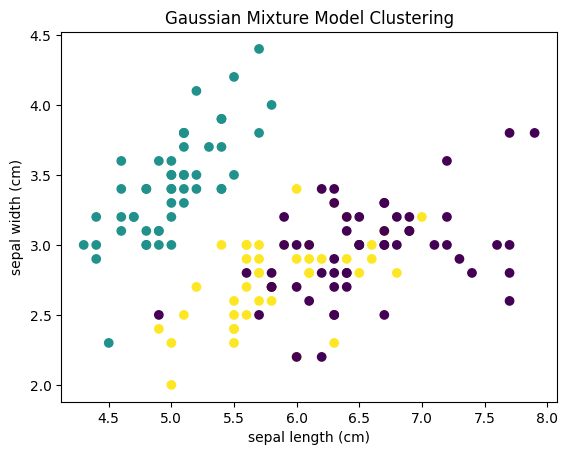

In [69]:
plt.scatter(X[:, 0], X[:, 1], c = cluster_labels, cmap = 'viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Gaussian Mixture Model Clustering')
plt.show()

### 5) BPNN

In [70]:
from sklearn.datasets import make_circles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
samples = 1000

In [72]:
X, y = make_circles(samples,random_state = 42, noise = 0.03)

In [73]:
circles  = {"X0":X[:,0],"X1":X[:,1],"label" : y}

<Axes: xlabel='X0', ylabel='X1'>

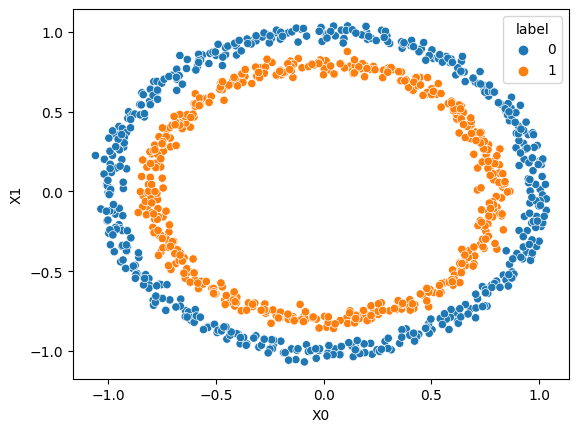

In [74]:
sns.scatterplot(data = circles, x="X0", y="X1", hue = 'label')

In [75]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, test_size = 0.3)

In [77]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation="relu",input_shape=(2,)),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [78]:
model.compile (loss="binary_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate=0.2),metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
history = model.fit(X_train,y_train,epochs=5)

Epoch 1/5
22/22 [==============================] - 1s 3ms/step - loss: 0.6889 - accuracy: 0.5657
Epoch 2/5
22/22 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 0.6414
Epoch 3/5
22/22 [==============================] - 0s 2ms/step - loss: 0.6369 - accuracy: 0.6129
Epoch 4/5
22/22 [==============================] - 0s 2ms/step - loss: 0.6207 - accuracy: 0.6771
Epoch 5/5
22/22 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.5400


In [81]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.6406 - accuracy: 0.5200


[0.6405813694000244, 0.5199999809265137]

Text(0, 0.5, 'Loss Values')

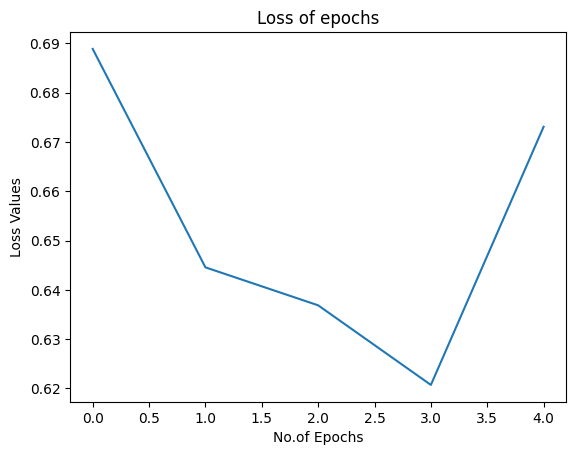

In [82]:
plt.plot(history.history['loss'])
plt.title('Loss of epochs')
plt.xlabel('No.of Epochs')
plt.ylabel('Loss Values')

In [83]:
def plotq(model,X,y):
    x_min, x_max = X[:,0].min()-0.1,X[:,0].max()+0.1
    y_min, y_max = X[:,1].min()-0.1,X[:,1].max()+0.1
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))
    x_in = np.c_[xx.ravel(),yy.ravel()]
    y_pred = model.predict(x_in)
    if len(y_pred[0])>1:
        print('Doing Multiple Classification')
        y_pred = argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print('Doing Binary')
        y_pred = np.round(y_pred).reshape(xx.shape)
        
        plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
        plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
        plt.xlim(xx.min(),xx.max())
        plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 1s 1ms/step
Doing Binary
313/313 [==============================] - 0s 1ms/step
Doing Binary


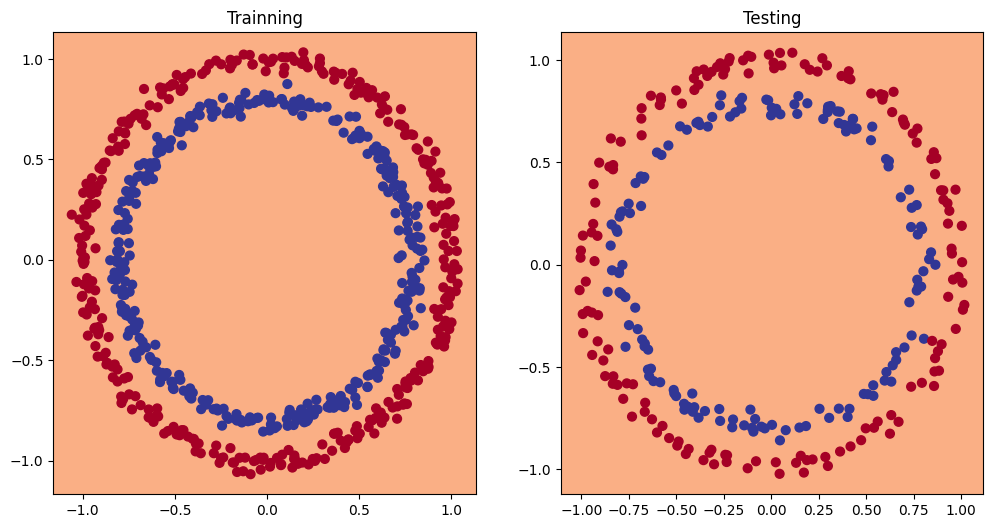

In [84]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Trainning")
plotq(model,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Testing")
plotq(model,X_test,y_test)

### SVM

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [89]:
iris = load_iris()

In [91]:
X = iris.data[:,:2]

In [92]:
y = iris.target

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [95]:
svm_classifier = SVC(kernel = 'linear',C=1)

In [119]:
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

In [120]:
print('Accuracy Score : ',accuracy_score(y_test,y_pred))

Accuracy Score :  0.8


In [121]:
print('Classification Report : ', classification_report(y_test,y_pred))

Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



In [122]:
x_min,x_max = X[:, 0].min()-1,X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1,X[:, 1].max()+1

In [123]:
xx, yy = np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))

In [124]:
z = svm_classifier.predict(np.c_[xx.ravel(),yy.ravel()])

In [125]:
z = z.reshape(xx.shape)

Text(0.5, 1.0, 'SVM Classification')

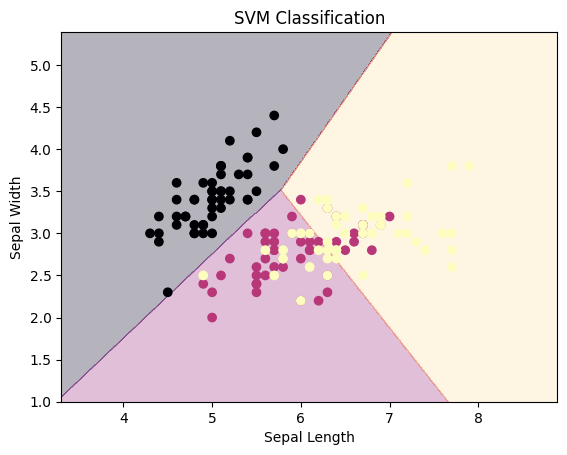

In [126]:
plt.contourf(xx,yy,z,cmap='magma', alpha = 0.3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='magma')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM Classification')

### Decision Tree and Random Forest

In [127]:
# Decision Tree 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [128]:
data = pd.read_csv('kyphosis.csv')

In [130]:
X = data.drop('Kyphosis',axis=1)

In [131]:
y = data['Kyphosis']

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [135]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [136]:
print('Accuracy Score : ',accuracy_score(y_pred,y_test))

Accuracy Score :  0.64


In [137]:
print('Classification Report :',classification_report(y_pred,y_test))

Classification Report :               precision    recall  f1-score   support

      absent       0.79      0.75      0.77        20
     present       0.17      0.20      0.18         5

    accuracy                           0.64        25
   macro avg       0.48      0.47      0.48        25
weighted avg       0.66      0.64      0.65        25



In [138]:
print('Confusion Matrix : \n',confusion_matrix(y_pred,y_test))

Confusion Matrix : 
 [[15  5]
 [ 4  1]]


In [139]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

In [143]:
randf = RandomForestClassifier(max_depth = 10, min_samples_split = 5, min_samples_leaf = 2)

In [144]:
randf = randf.fit(X_train,y_train)

In [145]:
y_pred = randf.predict(X_test)

In [146]:
print('Accuracy Score : ',accuracy_score(y_pred,y_test))

Accuracy Score :  0.8


In [147]:
print('Classification Report : ', classification_report(y_pred,y_test))

Classification Report :                precision    recall  f1-score   support

      absent       1.00      0.79      0.88        24
     present       0.17      1.00      0.29         1

    accuracy                           0.80        25
   macro avg       0.58      0.90      0.58        25
weighted avg       0.97      0.80      0.86        25



In [148]:
print('Confusion matrix : \n ',confusion_matrix(y_pred,y_test))

Confusion matrix : 
  [[19  5]
 [ 0  1]]
